In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/cereal.csv', encoding = 'Latin1')
df.dropna(inplace = True)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# **`Data Prfiling`**

In [41]:

import altair as alt
alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
    column=['rating', 'cups', 'weight', 'shelf', 'vitamins', 'potass', 'sugars', 'carbo', 'fiber', 'sodium', 'fat', 'protein', 'calories']
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.RepeatChart(...)

# **`Grouping`**

In [25]:

df.groupby('name',).mean('rating')['rating'].sort_values(ascending=False).head(20)


,rating
name,
All-Bran with Extra Fiber,93.704912
Shredded Wheat 'n'Bran,74.472949
Shredded Wheat spoon size,72.801787
100% Bran,68.402973
Shredded Wheat,68.235885
Cream of Wheat (Quick),64.533816
Puffed Wheat,63.005645
Puffed Rice,60.756112
Nutri-grain Wheat,59.642837


# **`Analytics`**

<ipython-input-29-b78244b92d6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('name',).mean('rating')['rating'].sort_values(ascending=False).head(20).values,y=df.groupby('name',).mean('rating')['rating'].sort_values(ascending=False).head(20).index,palette='viridis')


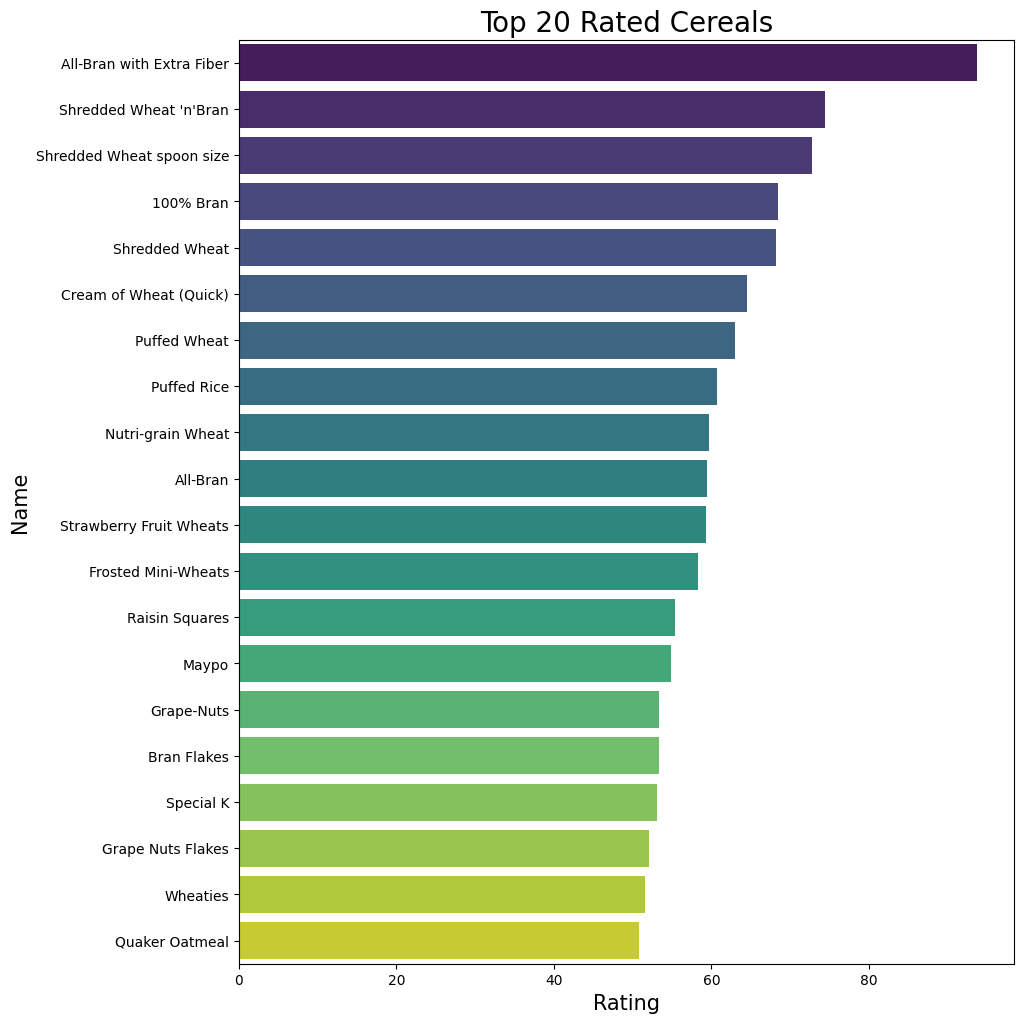

In [29]:
plt.figure(figsize=(10,12))
sns.barplot(x=df.groupby('name',).mean('rating')['rating'].sort_values(ascending=False).head(20).values,y=df.groupby('name',).mean('rating')['rating'].sort_values(ascending=False).head(20).index,palette='viridis')
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Name',fontsize=15)
plt.title('Top 20 Rated Cereals',fontsize=20)
plt.show()


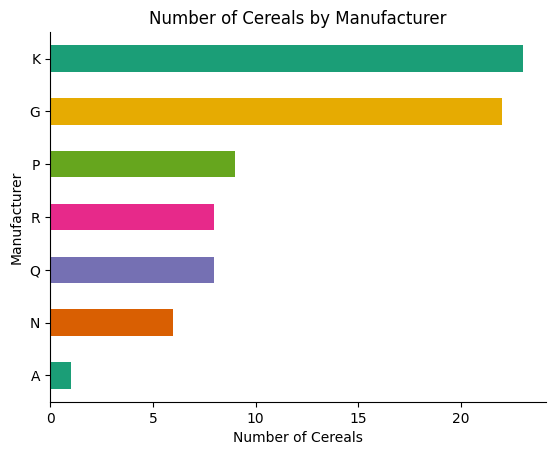

In [15]:
mfr_counts = df.groupby('mfr').size().sort_values(ascending=True)
mfr_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Number of Cereals')
plt.ylabel('Manufacturer')
plt.title('Number of Cereals by Manufacturer')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# `Nuttriton facts 💪`

In [36]:
df.groupby('name').mean(['protein', 'calories', 'fat'])[['protein', 'calories', 'fat']].sort_values('protein', ascending=True).head(20)

,protein,calories,fat
name,,,
Puffed Rice,1.0,50.0,0.0
Golden Grahams,1.0,110.0,1.0
Honey Graham Ohs,1.0,120.0,2.0
Honey-comb,1.0,110.0,0.0
Count Chocula,1.0,110.0,1.0
Corn Pops,1.0,110.0,0.0
Cocoa Puffs,1.0,110.0,1.0
Frosted Flakes,1.0,110.0,0.0
Cinnamon Toast Crunch,1.0,120.0,3.0


<Figure size 1000x1200 with 0 Axes>

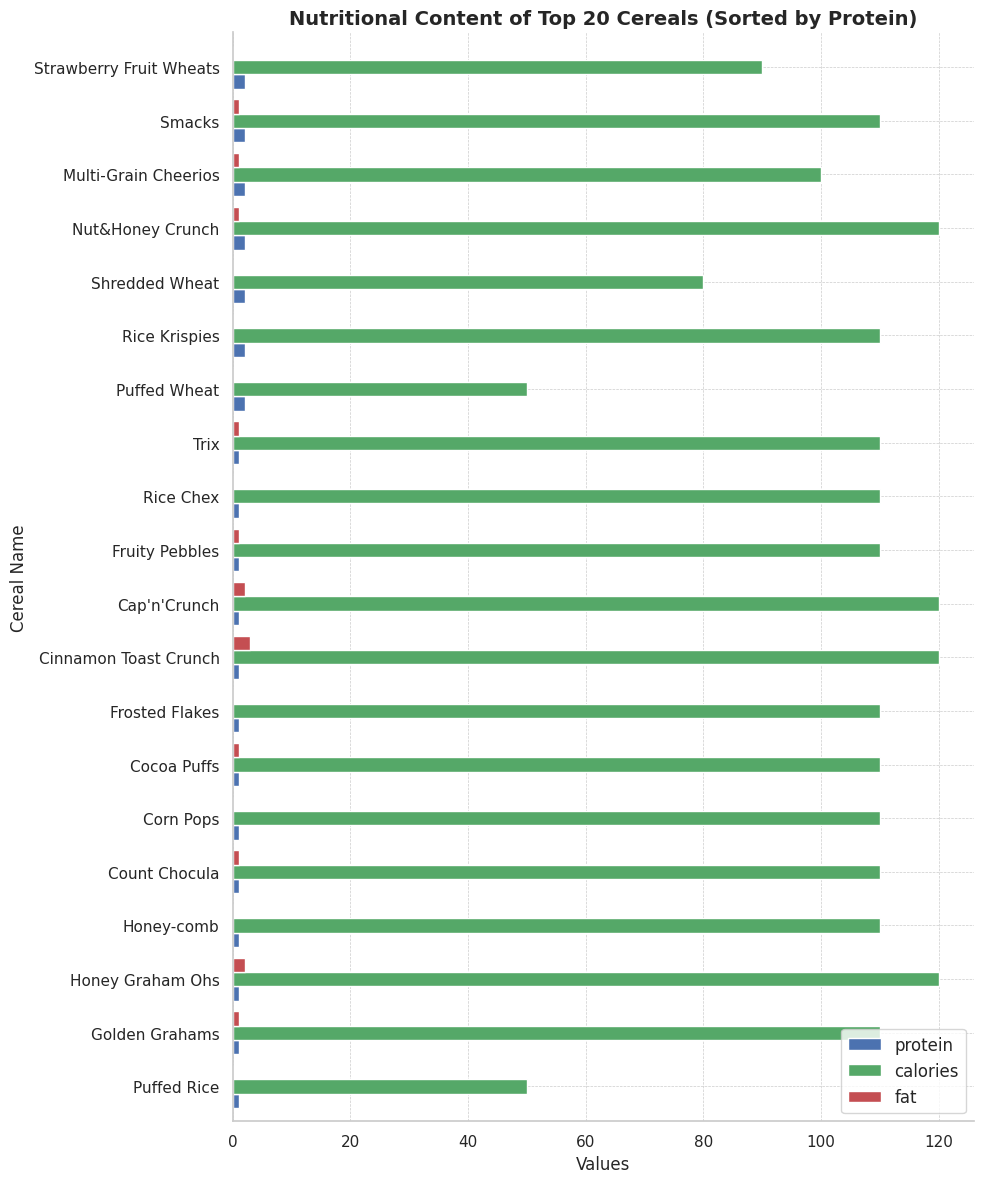

In [46]:
temp = df.groupby('name').mean(['protein', 'calories', 'fat'])[['protein', 'calories', 'fat']].sort_values('protein', ascending=True).head(20)

plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

ax = temp.plot(kind='barh', figsize=(10, 12), width=0.8, color=['#4c72b0', '#55a868', '#c44e52'])

ax.set_xlabel('Values', fontsize=12)
ax.set_ylabel('Cereal Name', fontsize=12)
ax.set_title('Nutritional Content of Top 20 Cereals (Sorted by Protein)', fontsize=14, weight='bold')
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()